In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = pd.get_dummies(df, drop_first=True) 
 # Remove the first category to avoid collinearity. Original variables are dropped
print(df.shape)
df.head()

(205, 191)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


1.7776781560914454


<AxesSubplot:>

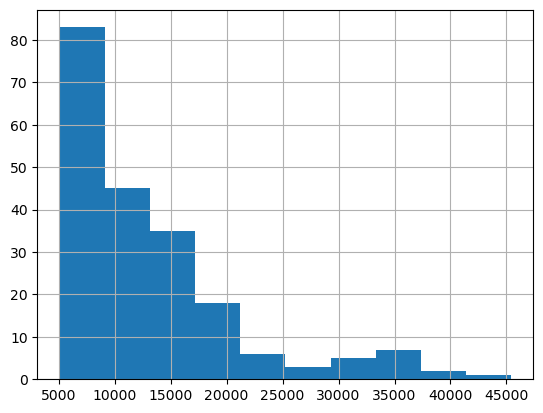

In [6]:
print(df.price.skew())  
df.price.hist()  # skewed to right (posive skew)

0.672888533977329


<AxesSubplot:>

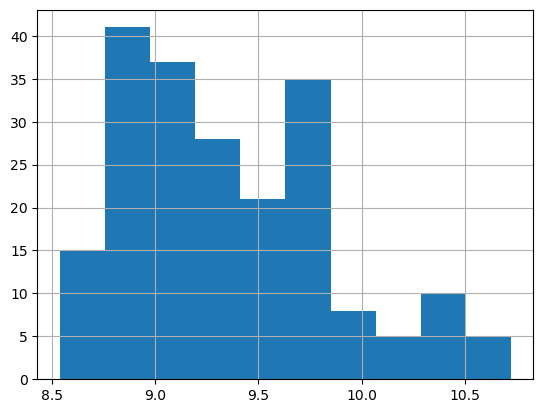

In [7]:
df['lnprice'] = np.log(df.price) 
 # np.log1p: change 0 to 1 and apply log if there are zero values
print(df.lnprice.skew())
df.lnprice.hist()

In [8]:
df=df.drop('price', axis=1) 
y = df.lnprice
x = df.drop('lnprice', axis=1) 

In [37]:
m1 = LinearRegression()
mse1 = -(model_selection.cross_val_score(m1, x, y, scoring='neg_mean_squared_error'))
mse1

array([1.82720399, 0.48150571, 0.45567823, 0.48418496, 5.31956988])

## 2.	Define y and x. Run an OLS model using 5-fold cross validation (without standardization). Report the average MSE.

In [46]:
AVmse1 = np.mean(mse1)
AVmse1

1.7136285529798503

## 3.	(Use standardized predictors) Run ridge regression for a proper range of the shrinkage parameters (lambda or alpha). Plot the estimated coefficients as a function of the shrinkage parameters.

In [39]:
x1 = StandardScaler().fit_transform(x)
a = arange(1, 200, 10) 
m2 = Ridge()
coef = []
for i in a:
    m2.set_params(alpha = i).fit(x1, y)
    coef.append(m2.coef_)
np.shape(coef)

(20, 190)

Text(0, 0.5, 'Ridge coefficient')

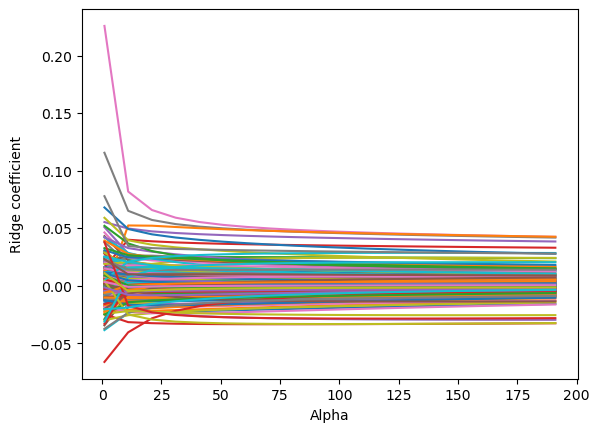

In [40]:
plt.plot(a, coef)
plt.xlabel('Alpha')
plt.ylabel('Ridge coefficient')

## 4.	(Use standardized predictors) Run ridge regression using leave-one-out cross validation for the range of the shrinkage parameters in Q3. Report the average MSE.

In [43]:
m2 = RidgeCV(alphas=a, store_cv_values=True).fit(x1,y)
mse2 = -m2.best_score_
mse2

0.029202608812755444

In [44]:
m2.cv_values_.shape 

(205, 20)

In [45]:
AVmse2 = np.mean(mse2)
AVmse2

0.029202608812755444

## 5.	(Use standardized predictors) Run lasso regression for a proper range of the shrinkage parameters (lambda or alpha). Plot the estimated coefficients as a function of the shrinkage parameters.

In [47]:
a1 = arange(0.0001, 0.3, 0.001)
m3 = Lasso(max_iter=100000)
coef = []
for i in a1:
    m3.set_params(alpha = i).fit(x1, y)
    coef.append(m3.coef_)

Text(0, 0.5, 'Lasso Coefficient')

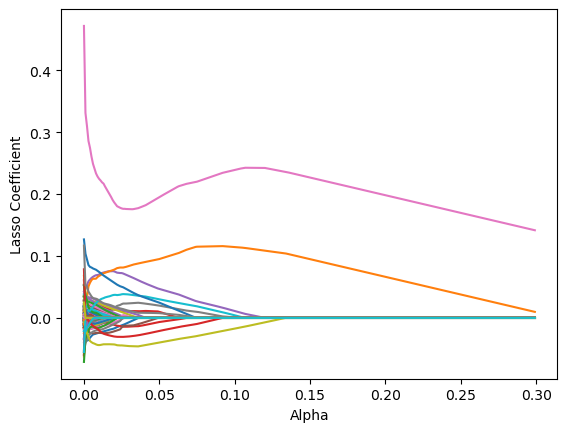

In [48]:
plt.plot(a1, coef)
plt.xlabel('Alpha')
plt.ylabel('Lasso Coefficient')

In [49]:
m3 = LassoCV().fit(x1,y)


In [50]:
print(m3.alphas_.shape)
m3.alphas_ 

(100,)


array([0.44791324, 0.41772538, 0.38957209, 0.36331624, 0.33882994,
       0.31599393, 0.294697  , 0.27483541, 0.25631242, 0.23903782,
       0.22292747, 0.20790291, 0.19389095, 0.18082335, 0.16863646,
       0.15727093, 0.14667139, 0.13678623, 0.1275673 , 0.11896969,
       0.11095153, 0.10347377, 0.09649998, 0.08999621, 0.08393076,
       0.07827411, 0.0729987 , 0.06807883, 0.06349054, 0.05921149,
       0.05522084, 0.05149914, 0.04802827, 0.04479132, 0.04177254,
       0.03895721, 0.03633162, 0.03388299, 0.03159939, 0.0294697 ,
       0.02748354, 0.02563124, 0.02390378, 0.02229275, 0.02079029,
       0.01938909, 0.01808233, 0.01686365, 0.01572709, 0.01466714,
       0.01367862, 0.01275673, 0.01189697, 0.01109515, 0.01034738,
       0.00965   , 0.00899962, 0.00839308, 0.00782741, 0.00729987,
       0.00680788, 0.00634905, 0.00592115, 0.00552208, 0.00514991,
       0.00480283, 0.00447913, 0.00417725, 0.00389572, 0.00363316,
       0.0033883 , 0.00315994, 0.00294697, 0.00274835, 0.00256

In [51]:
m3.alpha_ 

0.009649998139996604

In [52]:
print(m3.mse_path_.shape)  
m3.mse_path_ 

(100, 5)


array([[0.31797173, 0.43580711, 0.14773105, 0.2444446 , 0.08459581],
       [0.304201  , 0.43580711, 0.12736785, 0.23058531, 0.07527626],
       [0.27661185, 0.43580711, 0.11107185, 0.21825033, 0.06720445],
       [0.25240489, 0.43225801, 0.09700562, 0.20726003, 0.06015391],
       [0.23115384, 0.40114586, 0.08513477, 0.19745694, 0.05419494],
       [0.21125279, 0.37367272, 0.07514644, 0.18870287, 0.04914555],
       [0.19353021, 0.34939246, 0.0667711 , 0.18087655, 0.04487996],
       [0.17793802, 0.31737832, 0.05978043, 0.17387147, 0.04128537],
       [0.16421026, 0.28393307, 0.05397154, 0.16759399, 0.03826895],
       [0.15211532, 0.25471249, 0.04917482, 0.16196182, 0.03574552],
       [0.14144938, 0.22917142, 0.04524009, 0.15690252, 0.0336453 ],
       [0.13203925, 0.20684166, 0.04203759, 0.15235229, 0.03190805],
       [0.12372889, 0.18731527, 0.03945851, 0.14825494, 0.03047806],
       [0.11638369, 0.17022982, 0.03740866, 0.1445609 , 0.02931237],
       [0.10988515, 0.15527625, 0.

In [53]:
alp=m3.alphas_ 
alp_list = alp.tolist()
len(alp_list)

100

In [54]:
best_idx = alp_list.index(m3.alpha_) 
best_idx

55

In [55]:
mse3=m3.mse_path_[best_idx]
mse3

array([0.07514059, 0.04132   , 0.02972951, 0.06995916, 0.0454599 ])

In [62]:
AVmse3 = np.mean(mse3)
AVmse3

0.05232183276764405

## 7.	Calculate the percentage of non-zero coefficients from the lasso regression in Q6.

In [63]:
print(len(m3.coef_))
m3.coef_[0:20]

190


array([-2.43061105e-02,  0.00000000e+00,  0.00000000e+00,  2.42759823e-02,
        6.96138051e-02,  0.00000000e+00,  2.26433357e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.70540673e-02,
       -0.00000000e+00, -1.93102957e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.21163783e-02,  6.07668947e-03,  0.00000000e+00])

In [64]:
print(type(m3.coef_))
type(m3.coef_.nonzero())

<class 'numpy.ndarray'>


tuple

In [65]:
len(m3.coef_.nonzero()[0])

61

In [66]:
print('Out of {} coefficients, {} are non-zero'.format(len(m3.coef_), len(m3.coef_.nonzero()[0])))

Out of 190 coefficients, 61 are non-zero



## 8.	Compare MSEs from the three models: OLS, ridge regression with cross validation, lasso with cross validation.


In [73]:
print(AVmse1, AVmse2, AVmse3)
(AVmse2-AVmse3)/AVmse3  

1.7136285529798503 0.029202608812755444 0.05232183276764405


-0.44186571325891305

In [74]:
(AVmse2-AVmse1)/AVmse1 

-0.9829586121438192